I. Time Series Analysis on Sales Dataset


Visualize Sales Trends

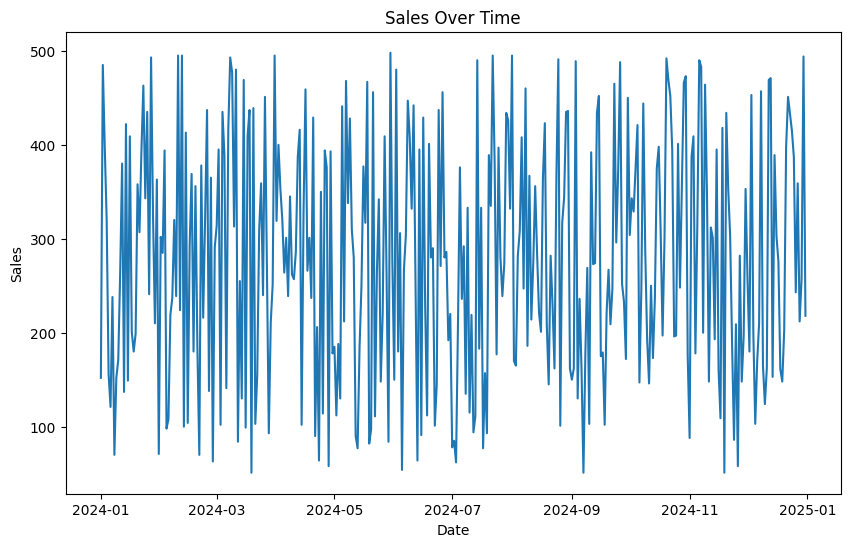

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('sales_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Plot sales data
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

ARIMA Model

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Sales'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast future sales
forecast = model_fit.forecast(steps=30)
print(forecast)

2025-01-01    327.262666
2025-01-02    306.709644
2025-01-03    290.199977
2025-01-04    320.746401
2025-01-05    321.440167
2025-01-06    299.868178
2025-01-07    313.978606
2025-01-08    307.114524
2025-01-09    308.386817
2025-01-10    312.139083
2025-01-11    309.966884
2025-01-12    309.147096
2025-01-13    310.263659
2025-01-14    309.281475
2025-01-15    309.878339
2025-01-16    310.076177
2025-01-17    309.745518
2025-01-18    309.811341
2025-01-19    309.833083
2025-01-20    309.753315
2025-01-21    309.852235
2025-01-22    309.836137
2025-01-23    309.808933
2025-01-24    309.823622
2025-01-25    309.814789
2025-01-26    309.814122
2025-01-27    309.824612
2025-01-28    309.819330
2025-01-29    309.818645
2025-01-30    309.819686
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\megha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\megha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\megha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model Validation

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Assuming `df` is your dataset
train_size = int(len(df) * 0.8)  # 80% for training
train_data, test_data = df[:train_size], df[train_size:]

# Make predictions on the test set
predictions = model_fit.predict(start=train_size, end=len(df)-1)

# Calculate RMSE and MAPE
rmse = mean_squared_error(test_data['Sales'], predictions, squared=False)
mape = mean_absolute_percentage_error(test_data['Sales'], predictions)

print(f'RMSE: {rmse}, MAPE: {mape}')

RMSE: 141.34068102392658, MAPE: 0.5930306584401356


C:\Users\megha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


II. Predicting Heart Disease Using Logistic Regression

Load and clean the Dataset

In [22]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart_disease.csv')

# Check for missing values
print(df.isnull().sum())

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
Heart Disease    0
dtype: int64


Feature Engineering

In [23]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
df[['age', 'chol', 'trestbps']] = scaler.fit_transform(df[['age', 'chol', 'trestbps']])

Model Training


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase from default 100 to 1000
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [26]:
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='saga')

Model Evaluation

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

[[  0 102]
 [  0 103]]
              precision    recall  f1-score   support

          No       0.00      0.00      0.00       102
         Yes       0.50      1.00      0.67       103

    accuracy                           0.50       205
   macro avg       0.25      0.50      0.33       205
weighted avg       0.25      0.50      0.34       205



C:\Users\megha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\megha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\megha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\megha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classific